In [1]:
import geopandas as gpd

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import os

In [6]:
country_bounds_gdf = gpd.read_file('../data/geoBoundariesCGAZ_ADM0/geoBoundariesCGAZ_ADM0.shp')

In [7]:
country_bounds_gdf.shape

(218, 4)

AFG


FileNotFoundError: [Errno 2] No such file or directory: '../app/data/geoBoundariesCGAZ_ADM0/AFG'

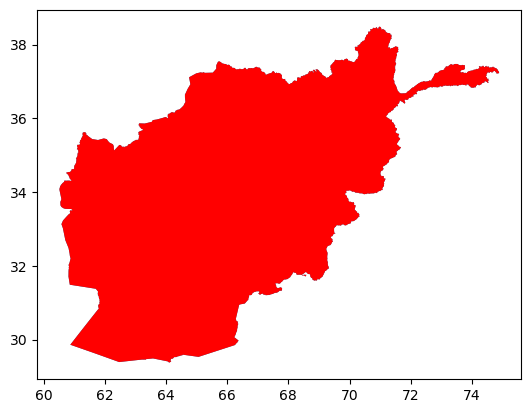

In [8]:
for i in range(country_bounds_gdf.shape[0]):
    foo = country_bounds_gdf.iloc[i:i+1].reset_index(drop=True)
    ax = foo.plot()
    bar = foo.copy()
    bar["geometry"] = foo["geometry"].simplify(tolerance=0.001, preserve_topology=True)
    ax=bar.plot(ax=ax,color='red')
    
    country_code = foo.iloc[0].shapeGroup
    print(country_code)
    country_dir = f"../data/geoBoundariesCGAZ_ADM0/{country_code}"
    if not os.path.isdir(country_dir): os.mkdir(country_dir)
    foo.to_file(f"{country_dir}/{country_code}_full.geojson", driver="GeoJSON")
    bar.to_file(f"{country_dir}/{country_code}_simple.geojson", driver="GeoJSON")
    fig = ax.get_figure()
    fig.savefig(f"{country_dir}/{country_code}_comparison.png")
    plt.close(fig)



In [29]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

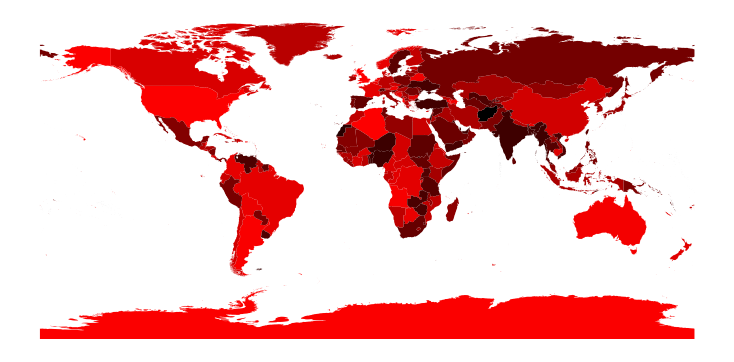

In [43]:
country_bounds_gdf['id'] = np.arange(country_bounds_gdf.shape[0]) 
# Plot and save with country IDs as color
fig, ax = plt.subplots(figsize=(10, 5),dpi=72)
ax.set_axis_off()  # Hide axes for clean image

fig.subplots_adjust(wspace=0,hspace=0,left=0,right=1,top=1,bottom=0)
colors = [[i,0,0] for i in range(country_bounds_gdf.shape[0])]
cmap = ListedColormap(colors)
country_bounds_gdf.plot(column='id', linewidth=0, cmap=cmap,ax=ax)
ax.set_position([0, 0, 1, 1])
fig.savefig('output_image.png', dpi=300, bbox_inches='tight', pad_inches=0, transparent=False)

In [53]:
new_gdf = country_bounds_gdf.copy()

In [60]:
tolerance=0.1
new_gdf['geometry'] = country_bounds_gdf['geometry'].simplify(tolerance, preserve_topology=True)


<Axes: >

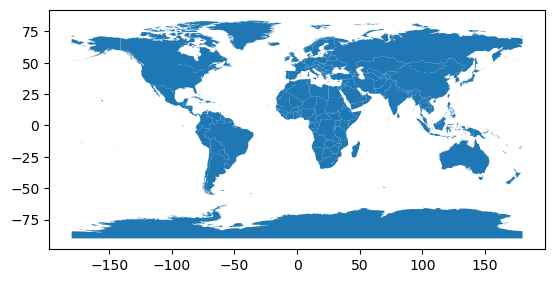

In [61]:
new_gdf.plot()

In [62]:
new_gdf.to_file("test.geojson",driver='GeoJSON')